In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import structure
import importlib
import sys
import pymol
from pymol import cmd
import numpy as np
import json 

#PATH_DATA ="data/750ns/apo_2IYQ_A"
#PATH_DATA ="data/apo_1ALB_A-holo_1LIC_A"
# PATH_DATA ="data/apo_1ALV_A-holo_1NX3_A"
PATH_DATA ="data/apo_1PZT_A-holo_1PZY_D_250ns"


COLORS = {
    'apo': 'blue',
    'holo': 'green',    
    'trj': 'yellow',    
    'lig': 'white'
}
POCKET_THRESHOLD = 6

f = open(f'{PATH_DATA}/vis.json')
settings = json.load(f)

# class PATH:
#     GRO = 'data/holo_conf_0ps_noW.gro'
#     TRJ = 'data/traj_1_4_whole_nopbc_fitted_noW.xtc'
#     APO = 'data/apo-orig/1nep-not_NAG_PO4_HOH.pdb'
#     HOLO = 'data/holo-orig/2hka.pdb'

# CHAIN = 'C'
# LIGAND = 'C3S'

# class PATH:
#     GRO = 'data/holo_2HVD_C-apo_3L7U_C/2HVD_C/holo_start.gro'
#     TRJ = 'data/holo_2HVD_C-apo_3L7U_C/2HVD_C/traj_1_2_whole_nopbc.xtc'
#     APO = 'data/holo_2HVD_C-apo_3L7U_C/orig/3l7u.pdb'
#     HOLO = 'data/holo_2HVD_C-apo_3L7U_C/orig/2hvd.pdb'

# CHAIN = 'C'
# LIGAND = 'ADP'

class PATH:
    GRO = f'{PATH_DATA}/{settings["path"]["gro"]}'
    TRJ = f'{PATH_DATA}/{settings["path"]["trj"]}'
    APO = f'{PATH_DATA}/{settings["path"]["apo"]}'
    HOLO = f'{PATH_DATA}/{settings["path"]["holo"]}'

CHAIN_APO = settings["chain_apo"]
CHAIN_HOLO = settings["chain_holo"]
LIGAND = settings["ligand"]

f.close() 



In [3]:
# open a PyMOL window
_stdouterr = sys.stdout, sys.stderr
pymol.finish_launching(['pymol', '-q'])
sys.stdout, sys.stderr = _stdouterr

Qt not available (pymol.Qt), using GLUT/Tk interface


Plugin 'lightingsettings_gui' only available with PyQt GUI.


In [4]:
cmd.reinitialize()
cmd.pwd()
cmd.load(PATH.GRO, 'trj')
cmd.load_traj(PATH.TRJ, 'trj')
cmd.load(PATH.APO, 'apo')
cmd.load(PATH.HOLO, 'holo')
cmd.remove(f'holo and not(holo and chain {CHAIN_HOLO} and (polymer or resn {LIGAND}))')
cmd.remove(f'apo and not(apo and chain {CHAIN_APO})')
cmd.remove(f'apo and not polymer')
# cmd.remove("apo and not altloc ''")
cmd.remove(f'holo and solvent')
cmd.remove(f'trj and hydrogens')
cmd.remove(f'apo and hydrogens')
cmd.remove(f'holo and hydrogens')

c:\projects\gromacs-analysis


In [5]:
cmd.intra_fit('trj')
cmd.align(mobile='apo', target='trj', target_state=1)
cmd.align(mobile='holo', target='trj', target_state=1)
# cmd.align(mobile='apo AND name CA', target='trj AND name CA', target_state=1)
# cmd.align(mobile='holo  AND name CA', target='trj AND name CA', target_state=1)
cmd.zoom('all')

In [11]:
apo = pymol.cmd.get_model('apo')
trj = pymol.cmd.get_model('trj', 1)
s_apo = structure.Structure(apo, 'apo')
s_trj = structure.Structure(trj, 'holo')
a = [(a.resn, a.resi, a.name) for a in s_apo.atoms]
t = [(a.resn, a.resi, a.name) for a in s_trj.atoms]


{('ALA', 314, 'CB'),
 ('ARG', 349, 'CB'),
 ('ARG', 349, 'CD'),
 ('ARG', 349, 'CG'),
 ('ARG', 349, 'CZ'),
 ('ARG', 349, 'NE'),
 ('ARG', 349, 'NH1'),
 ('ARG', 349, 'NH2'),
 ('ASP', 350, 'CB'),
 ('ASP', 350, 'CG'),
 ('ASP', 350, 'OD1'),
 ('ASP', 350, 'OD2'),
 ('HIS', 347, 'CB'),
 ('HIS', 347, 'CD2'),
 ('HIS', 347, 'CE1'),
 ('HIS', 347, 'CG'),
 ('HIS', 347, 'ND1'),
 ('HIS', 347, 'NE2'),
 ('ILE', 147, 'CD'),
 ('ILE', 151, 'CD'),
 ('ILE', 177, 'CD'),
 ('ILE', 184, 'CD'),
 ('ILE', 185, 'CD'),
 ('ILE', 186, 'CD'),
 ('ILE', 205, 'CD'),
 ('ILE', 215, 'CD'),
 ('ILE', 218, 'CD'),
 ('ILE', 256, 'CD'),
 ('ILE', 273, 'CD'),
 ('ILE', 304, 'CD'),
 ('ILE', 321, 'CD'),
 ('ILE', 339, 'CD'),
 ('ILE', 345, 'CD'),
 ('ILE', 363, 'CD'),
 ('ILE', 394, 'CD'),
 ('ILE', 398, 'CD'),
 ('SER', 348, 'CB'),
 ('SER', 348, 'OG'),
 ('SER', 402, 'OC1'),
 ('SER', 402, 'OC2')}

In [12]:
print(set(t)-set(a))

{('ILE', 363, 'CD'), ('ILE', 321, 'CD'), ('ARG', 349, 'CD'), ('ARG', 349, 'NH1'), ('ILE', 398, 'CD'), ('ARG', 349, 'CB'), ('ILE', 147, 'CD'), ('ILE', 345, 'CD'), ('ILE', 394, 'CD'), ('SER', 402, 'OC1'), ('ARG', 349, 'CG'), ('HIS', 347, 'CD2'), ('SER', 402, 'OC2'), ('ASP', 350, 'OD1'), ('HIS', 347, 'CB'), ('ILE', 215, 'CD'), ('ILE', 151, 'CD'), ('ILE', 184, 'CD'), ('ILE', 186, 'CD'), ('HIS', 347, 'CG'), ('ASP', 350, 'OD2'), ('ARG', 349, 'NH2'), ('ASP', 350, 'CB'), ('SER', 348, 'OG'), ('ARG', 349, 'NE'), ('ILE', 177, 'CD'), ('ILE', 256, 'CD'), ('ASP', 350, 'CG'), ('HIS', 347, 'NE2'), ('ILE', 205, 'CD'), ('ILE', 304, 'CD'), ('HIS', 347, 'CE1'), ('HIS', 347, 'ND1'), ('ALA', 314, 'CB'), ('SER', 348, 'CB'), ('ARG', 349, 'CZ'), ('ILE', 218, 'CD'), ('ILE', 273, 'CD'), ('ILE', 339, 'CD'), ('ILE', 185, 'CD')}


: 

In [6]:
apo = pymol.cmd.get_model('apo')
trj = pymol.cmd.get_model('trj', 1)
s_apo = structure.Structure(apo, 'apo')
s_trj = structure.Structure(trj, 'holo')
a = [(a.resn, a.resi, a.name) for a in s_apo.atoms]
t = [(a.resn, a.resi, a.name) for a in s_trj.atoms]

if len(set(a)-set(t)):
        pymol.cmd.remove(f"apo and ({' or '.join([f'(resn {x[0]} and resi {x[1]} and name {x[2]})' for x in set(set(a)-set(t))])})")
if len(set(t)-set(a)):
    pymol.cmd.remove(f"trj and ({' or '.join([f'(resn {x[0]} and resi {x[1]} and name {x[2]})' for x in set(set(t)-set(a))])})")

In [9]:
from collections import Counter
[(x, count) for x, count in Counter(a).items()]

[(('THR', 132, 'N'), 1),
 (('THR', 132, 'CA'), 1),
 (('THR', 132, 'C'), 1),
 (('THR', 132, 'O'), 1),
 (('THR', 132, 'CB'), 1),
 (('THR', 132, 'CG2'), 1),
 (('THR', 132, 'OG1'), 1),
 (('ALA', 133, 'N'), 1),
 (('ALA', 133, 'CA'), 1),
 (('ALA', 133, 'C'), 1),
 (('ALA', 133, 'O'), 1),
 (('ALA', 133, 'CB'), 1),
 (('CYS', 134, 'N'), 1),
 (('CYS', 134, 'CA'), 1),
 (('CYS', 134, 'C'), 1),
 (('CYS', 134, 'O'), 1),
 (('CYS', 134, 'CB'), 1),
 (('CYS', 134, 'SG'), 1),
 (('PRO', 135, 'N'), 1),
 (('PRO', 135, 'CA'), 1),
 (('PRO', 135, 'C'), 1),
 (('PRO', 135, 'O'), 1),
 (('PRO', 135, 'CB'), 1),
 (('PRO', 135, 'CG'), 1),
 (('PRO', 135, 'CD'), 1),
 (('GLU', 136, 'N'), 1),
 (('GLU', 136, 'CA'), 1),
 (('GLU', 136, 'C'), 1),
 (('GLU', 136, 'O'), 1),
 (('GLU', 136, 'CB'), 1),
 (('GLU', 136, 'CG'), 1),
 (('GLU', 136, 'CD'), 1),
 (('GLU', 136, 'OE1'), 1),
 (('GLU', 136, 'OE2'), 1),
 (('GLU', 137, 'N'), 1),
 (('GLU', 137, 'CA'), 1),
 (('GLU', 137, 'C'), 1),
 (('GLU', 137, 'O'), 1),
 (('GLU', 137, 'CB'), 1),


In [6]:
# cmd.align(mobile='apo', target='trj', target_state=619)
# cmd.align(mobile='holo', target='trj', target_state=619)

In [7]:
cmd.create('lig', f'holo and chain {CHAIN_HOLO} and resn {LIGAND}')
cmd.remove(f'holo and resn {LIGAND}')

for sel in ['apo', 'holo', 'trj', 'lig']:
    cmd.color(COLORS[sel], sel)
cmd.zoom('all')

In [8]:
def_holo = f'byres(holo and polymer.protein within {POCKET_THRESHOLD} of resn {LIGAND})'
cmd.create('holo-pocket', def_holo)

holo_pocket_res_sel = ' or '.join([f"(resi {r.resi} and resn {r.resn})" for r in structure.Structure(cmd.get_model('holo-pocket'), def_holo).get_residues()])

def_trj = f"trj and ({holo_pocket_res_sel})"
def_apo = f"apo and ({holo_pocket_res_sel})"
cmd.create("trj-pocket", def_trj)
cmd.create("apo-pocket", def_apo)

In [9]:
cmd.show_as('sticks', 'holo-pocket')
cmd.show_as('sticks', 'trj-pocket')
cmd.show_as('sticks', 'apo-pocket')
cmd.zoom('all')
#cmd.set('stick_transparency', 0.5, 'holo-pocket')

In [10]:
cmd.orient('holo-pocket')
cmd.zoom('all')

In [11]:
cmd.save('session.pse')

: 

In [11]:
# model_holo = cmd.get_model(f"holo and not hydrogens and ({holo_pocket_res_sel})")
# model_apo = cmd.get_model(f"apo and not hydrogens and ({holo_pocket_res_sel})")
# model_trj = cmd.get_model(f"trj and not hydrogens and ({holo_pocket_res_sel})")

In [12]:
pocket_apo = structure.Structure(cmd.get_model('apo-pocket'), def_apo)
pocket_holo = structure.Structure(cmd.get_model('holo-pocket'), def_holo)

cnt_states = cmd.count_states('trj')
pocket_trj = []
for i in range(cnt_states):
    pocket_trj.append(structure.Structure(cmd.get_model("trj-pocket", i+1), def_trj, i+1))

In [13]:
# from FindSurfaceResidues import *

# sel = findSurfaceAtoms(selection='holo-pocket', cutoff=10)
# cmd.orient(sel)
# cmd.zoom('all')

In [14]:
# pocket_apo.sort_atoms()
# pocket_trj[0].sort_atoms()
# print(pocket_apo.atoms)
# print(pocket_trj[0].atoms)
# print(len(pocket_apo.atoms), len(pocket_trj[0].atoms))

In [15]:
def get_coords_ca_com(atoms:list[structure.Atom])->np.ndarray:
    # Retrieves coordinates of the CA residue and center of mass
    ca = None
    for a in atoms:
        if a.name == 'CA':
            ca = a.coord
    com = np.mean(structure.get_coords(atoms), axis=0)
    return np.array([ca, com])



In [16]:
pocket_apo.rmsd(pocket_trj[0])

1.4447766659846126

In [17]:
pocket_apo.rmsd(pocket_trj[0], get_coords_from_residue=get_coords_ca_com)

0.5057011568098202

In [18]:
pocket_apo.get_distances(pocket_trj[0])

array([0.26916051, 0.21712514, 0.31852435, 0.21770293, 0.3267638 ,
       0.22074251, 0.09518533, 0.28635917, 0.29731863, 0.21836093,
       0.23287303, 0.49795246, 0.90017864, 0.87473563, 1.25069058,
       0.46273019, 1.17120863, 0.25137273, 0.4672471 , 0.35755804,
       0.51294208, 0.64863081, 1.12995549, 0.66241936, 1.00863384,
       0.5955542 , 0.66755266, 0.6273622 , 0.37987296, 0.46576393,
       0.49832052, 0.17219705, 0.30785962, 0.19723978, 3.32659149,
       0.2046398 , 0.25724575, 0.34473408, 0.29143934, 0.70515232,
       0.63279146, 0.55541552, 0.54851365, 0.47537242, 0.39879577,
       1.08989239, 0.74868173, 0.42906143, 0.37139755, 0.39342333,
       0.53196349, 0.34791747, 1.05125148, 0.73879807, 0.76532905,
       0.7575433 , 0.82484871, 0.79193773, 0.89211203, 0.3719569 ,
       0.63643599, 0.64938568, 0.84732819, 3.3133607 , 1.61563695,
       0.55273827, 0.55873971, 0.98800578, 1.0201347 , 1.09831911,
       0.79882868, 1.09951361, 0.16749382, 0.49797048, 0.61746

In [19]:
rmsd_pocket = [pocket_apo.rmsd(pt) for pt in pocket_trj]

In [20]:
rmsd_pocket_ca_com = [pocket_apo.rmsd(pt, get_coords_from_residue=get_coords_ca_com) for pt in pocket_trj]

In [21]:
distances = [pocket_apo.get_distances(pt) for pt in pocket_trj]

In [22]:
cmd.set('dot_solvent', 1)

In [23]:
pocket_apo.get_sasa(cmd)
pocket_holo.get_sasa(cmd)
for pocket in pocket_trj:
    pocket.get_sasa(cmd)

In [24]:
[cmd.get_area(f'trj and ({holo_pocket_res_sel})',1)]

[930.58251953125]

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

<AxesSubplot:xlabel='ix', ylabel='rmsd'>

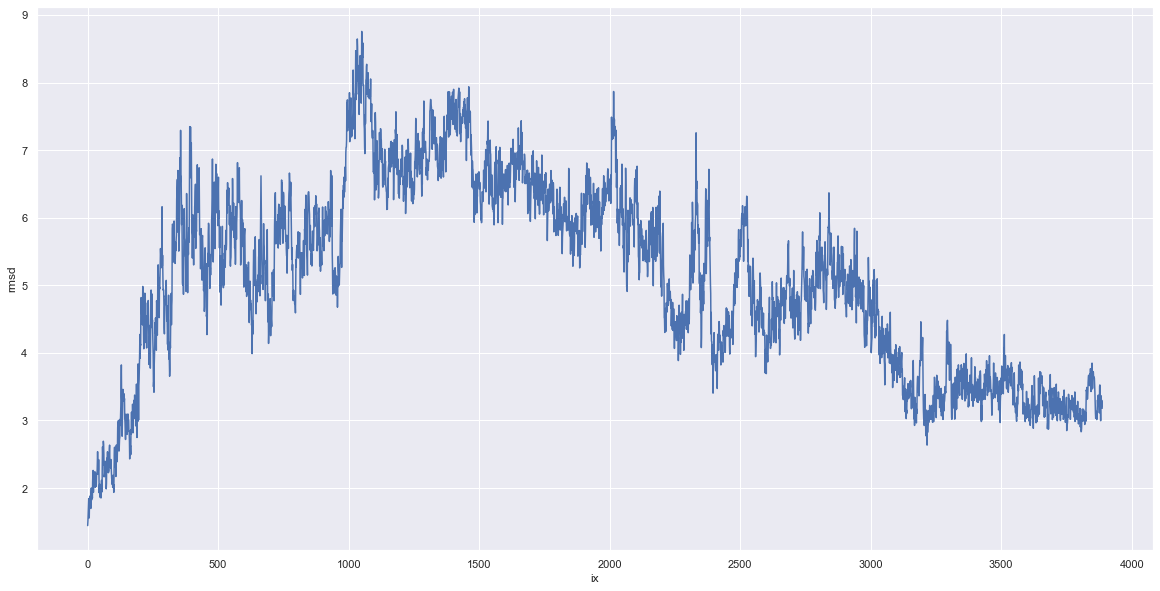

In [26]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=pd.DataFrame({'rmsd': rmsd_pocket, 'ix': list(range(len(rmsd_pocket)))}), x="ix", y="rmsd")

<AxesSubplot:xlabel='ix', ylabel='rmsd (CA+CoM)'>

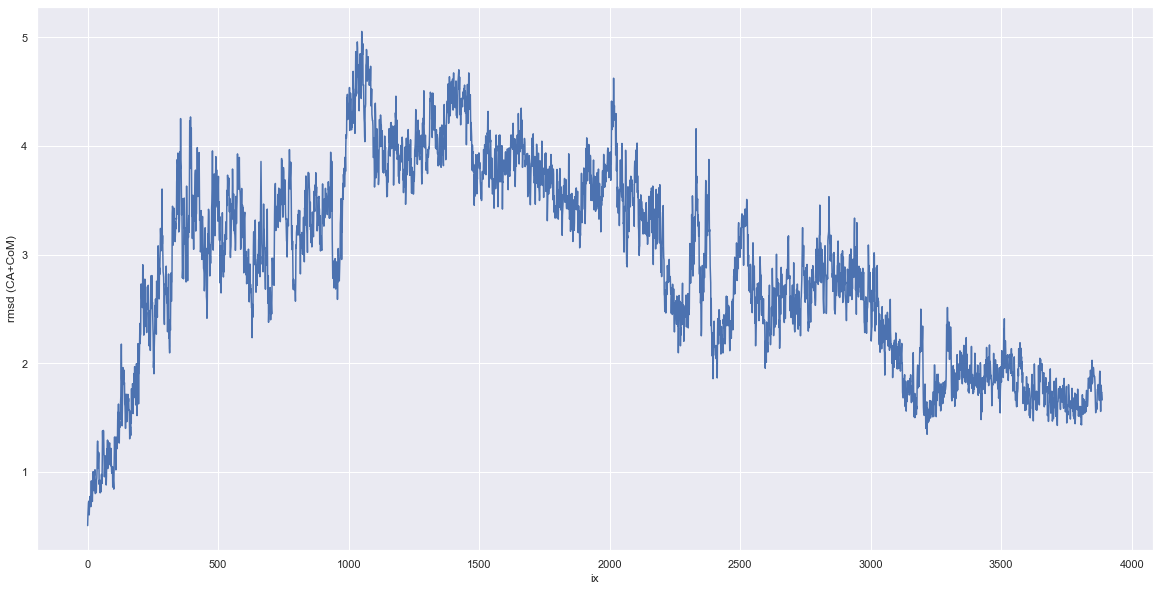

In [27]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=pd.DataFrame({'rmsd (CA+CoM)': rmsd_pocket_ca_com, 'ix': list(range(len(rmsd_pocket_ca_com)))}), x="ix", y="rmsd (CA+CoM)")

<AxesSubplot:xlabel='ix', ylabel='SASA from trj1'>

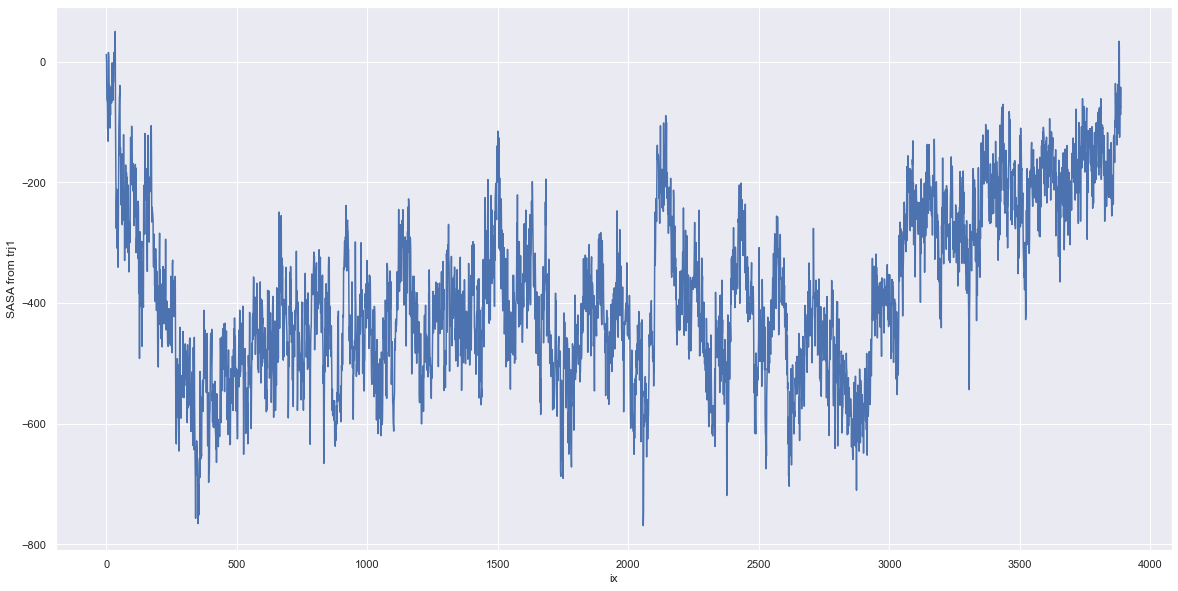

In [28]:
plt.figure(figsize=(20, 10))
sasa1 = pocket_trj[1].get_sasa(cmd)
sns.lineplot(data=pd.DataFrame({'SASA from trj1': [sasa1 - p.get_sasa(cmd) for p in pocket_trj], 'ix': list(range(len(pocket_trj)))}), x="ix", y="SASA from trj1")

In [29]:
rmsd_pocket_order = np.argsort(rmsd_pocket)
rmsd_ca_com_pocket_order = np.argsort(rmsd_pocket_ca_com)

In [30]:
for ix in rmsd_pocket_order:
    print(ix+1, rmsd_pocket[ix])

1 1.4447766659846126
2 1.5140827335262736
7 1.5577207744276302
3 1.6371992158148385
13 1.6985152227223108
6 1.7502265372865566
10 1.7883642055184434
4 1.7893196640189524
11 1.8093203347938036
8 1.8139049994032685
16 1.8226616065793289
12 1.826733381983794
5 1.8421767072045292
19 1.8518733388694777
52 1.8535774426377027
49 1.8619239807970833
9 1.8799480890762403
17 1.8821659813118574
18 1.9048831376936879
51 1.9292375819538694
45 1.9308982898658005
14 1.9340520032890778
50 1.934312198163403
101 1.9362291597021886
23 1.9371774321012767
56 1.9431142174725218
48 1.9794562297151201
72 1.9884746297954297
53 1.9896024405265285
15 2.000925481981852
99 2.0082291672550987
97 2.010669157690312
30 2.0106861855768736
55 2.0184838176058566
34 2.0262208362259955
25 2.0304667964619014
46 2.0324069184925064
31 2.0403008462101653
95 2.0537510079841614
100 2.0548295751491508
47 2.0597069256176783
73 2.0687432052351467
33 2.0706242820991023
20 2.090106638233611
54 2.1132220359468894
32 2.123075916766083
9

In [31]:
for ix in rmsd_ca_com_pocket_order:
    print(ix+1, rmsd_pocket_ca_com[ix])

1 0.5057011568098202
2 0.6038576564766049
7 0.6043019833454683
3 0.658888226138584
13 0.6796709423222108
8 0.6846312659873427
6 0.6999750797289284
4 0.7131161068370268
19 0.7278654591531168
5 0.7295474539413203
11 0.7302348262865681
10 0.7322964124688033
16 0.746640060183777
12 0.7551281275118071
18 0.7624508613666332
9 0.7730154203137415
30 0.8003713053859576
31 0.8020524413122136
49 0.8068526138893195
14 0.8074370810443214
34 0.8098711219131972
52 0.8161481601492642
25 0.826612401704156
17 0.8318908662905233
101 0.8414963176648038
23 0.8416241431438347
97 0.8602387712989608
33 0.860605139851116
51 0.8655013999826355
20 0.8703097853115471
48 0.8716935011875263
32 0.8743520783634477
72 0.8792568332925779
100 0.8845470412836832
45 0.8854666548801039
53 0.8913906492528724
50 0.8914634541081753
56 0.8929970818088145
15 0.9172623475945035
55 0.9193142666491846
99 0.9210968089903994
46 0.9227748405701176
47 0.926359533471735
35 0.9284906326577712
36 0.9412636609418493
65 0.9544752164338655


<AxesSubplot:ylabel='Count'>

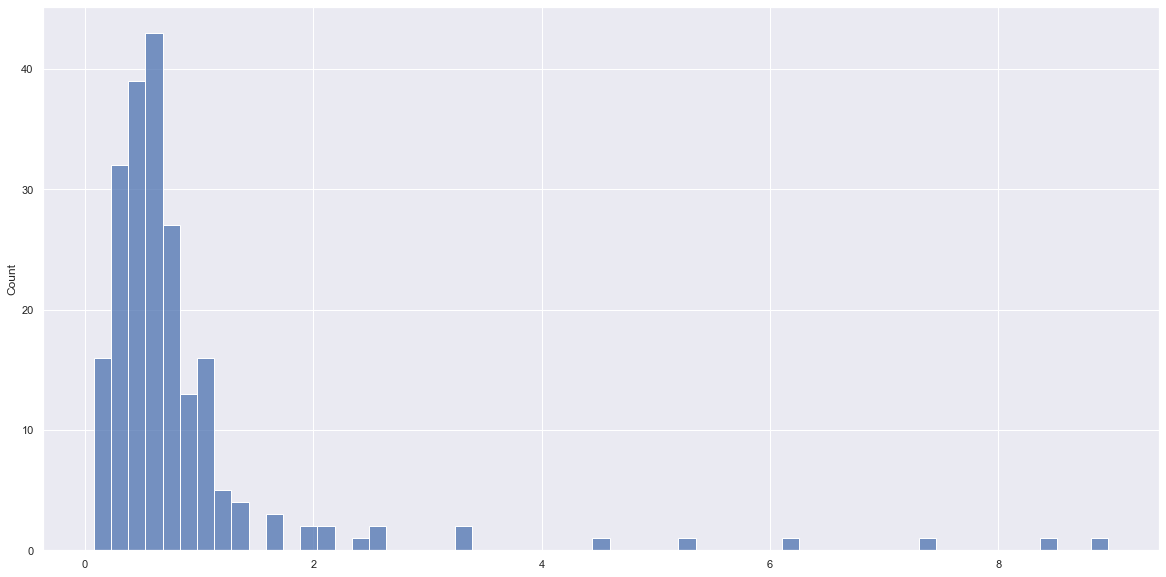

In [32]:
plt.figure(figsize=(20, 10))
sns.histplot(data=distances[0])

In [33]:
def dist_outlier(distances:np.ndarray, threshold:float=4)->bool:
    for d in distances:
        if d > threshold:
            return True        
    return False

dist_outliers4 = [dist_outlier(dists, 4) for dists in distances]
dist_outliers4

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [34]:
np.max(distances[0])

8.962343858281832

In [35]:
maxs = [np.max(dists) for dists in distances ]

In [36]:
ixs_order_maxs = np.argsort(maxs)

In [37]:
for ix in ixs_order_maxs:
    print(ix+1, maxs[ix])

162 6.567039176117304
170 6.68347357897768
159 6.760363771018178
171 6.925053967500755
95 6.929962991494808
150 6.935882278299079
160 6.96430979175623
79 6.968639795495522
161 7.0384636030186805
164 7.065539648688244
167 7.087905852899707
40 7.129027898516827
59 7.17039959546914
38 7.186996245677955
157 7.195117996142234
186 7.196896708089773
127 7.202958094392126
166 7.213533694866033
169 7.22599139146317
153 7.260233494864452
58 7.270252406935682
123 7.284171200559574
99 7.350675929615857
64 7.357367917354303
196 7.4129356181352035
156 7.485262907690466
165 7.508246523657493
112 7.5396405360946686
174 7.5610814865280345
146 7.606183035834949
102 7.610780977569634
98 7.6165529000611
120 7.63178364574079
154 7.635937110527216
119 7.636431810617139
190 7.650054353492407
92 7.667454553198413
107 7.6742544873768
144 7.681918215653247
124 7.687025041890057
121 7.6887012463542765
145 7.692361033582157
173 7.706285993456444
195 7.712163168201255
189 7.738616280148227
151 7.751805642675839
50

In [194]:
max_dist = 16
dist_outliers = []
for dists in distances:
    dist_outliers.append([dist_outlier(dists, i+1) for i in range(max_dist)])

In [195]:
df = pd.DataFrame(np.array(dist_outliers))

In [197]:
import pandas as pd

In [200]:
df.loc[df[6] == False]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
79,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
95,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
150,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
159,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
160,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
162,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
170,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False
171,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False


In [85]:
for i in range(20):
    print(f'Trajectory points with no distances above {i} angstroms: ')
    print([j for j in range(len(dist_outliers[i])) if not dist_outliers[i]])

Trajectory points with no distances above 0 angstroms: 
[]
Trajectory points with no distances above 1 angstroms: 
[]
Trajectory points with no distances above 2 angstroms: 
[]
Trajectory points with no distances above 3 angstroms: 
[]
Trajectory points with no distances above 4 angstroms: 
[]
Trajectory points with no distances above 5 angstroms: 
[]
Trajectory points with no distances above 6 angstroms: 
[]
Trajectory points with no distances above 7 angstroms: 
[]
Trajectory points with no distances above 8 angstroms: 
[]
Trajectory points with no distances above 9 angstroms: 
[]
Trajectory points with no distances above 10 angstroms: 
[]
Trajectory points with no distances above 11 angstroms: 
[]
Trajectory points with no distances above 12 angstroms: 
[]
Trajectory points with no distances above 13 angstroms: 
[]
Trajectory points with no distances above 14 angstroms: 
[]
Trajectory points with no distances above 15 angstroms: 
[]
Trajectory points with no distances above 16 angst

In [125]:
cmd.set('state', 80)

In [21]:
rmsd_pocket[103]

2.485758755897545

: 